In [1]:
from plot_utils import *

# The single spin flip algorithms

In [2]:
"""
df_rel = load_df('reluctant_2',pre_loaded=False)
df_ext = load_df('extremal_2',pre_loaded=False)
df_rand = load_df('random_flip_2',pre_loaded=False)
all_Ns = [40000,29213 ,21335,15581,11180,8310,6086,4432,3237,2364,1726,1261,920,672,491,358,262,191,139,102,74 ,]
df_ext = df_ext.groupby('n').head(10000) #10000
df_rand = df_rand.groupby('n').head(10000) #10000
df_rel = df_rel.groupby('n').head(3500) #3500
df_rel = df_rel[df_rel.n.isin(all_Ns)]

for name, df in [('reluctant',df_rel),('greedy',df_ext),('random',df_rand)]:
    df.e = df.e.apply(lambda x: x[0] if isinstance(x,np.ndarray) or isinstance(x,list) else x)
    df1 = df.groupby(['n']).e.agg(['mean','count','std'])
    df2 = df.groupby(['n']).t.agg(['mean'])
    df = pd.concat([df1,df2],axis=1).reset_index()
    df.columns = ['n','energy','energy_samples','energy_std','t']
    df.to_csv(CLEAN_DIR / f'{name}_avg.csv',index=None)

df_amp_energy = pd.read_csv('results/raw/iamp/iamp.csv',sep=',')
df_amp_energy.columns=['n','energy']
df_amp_energy = df_amp_energy.groupby('n').energy.agg(['mean','count','std']).reset_index()
df_amp_energy.columns = ['n','energy','energy_samples','energy_std']
df_amp_energy.to_csv(CLEAN_DIR / 'iamp_avg.csv',index=None)
"""

df_rel = pd.read_csv(CLEAN_DIR / f'reluctant_avg.csv')
df_ext = pd.read_csv(CLEAN_DIR / f'greedy_avg.csv')
df_rand = pd.read_csv(CLEAN_DIR / f'random_avg.csv')
df_amp_energy = pd.read_csv(CLEAN_DIR / f'iamp_avg.csv')

reluctant 0.4895102615809094
greedy 0.23782436435119012
random 0.25251384112988
used largest 8 points


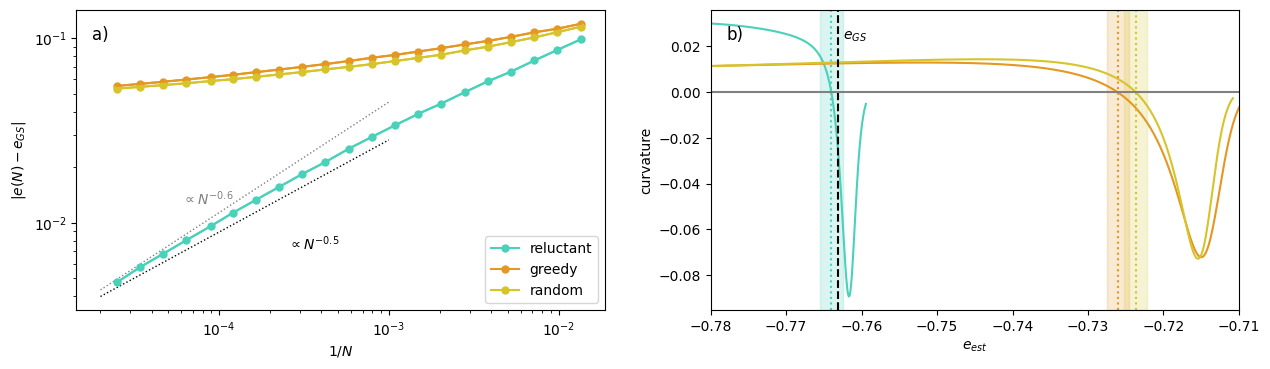

In [3]:
fig, axes = plt.subplots(1,2,figsize=(3*width,1.3*height))
ax = axes[0]



for name, df in [('reluctant',df_rel),('greedy',df_ext),('random',df_rand)]:
    n = df.n
    e = df.energy
    yerr = df.energy_std/np.sqrt(df.energy_samples)
    
    ax.plot(1/n,df.energy+gs,label=name,c=single_algo_color[name],marker='.',markersize=10)
    ax.errorbar(1/n,df.energy+gs,yerr=yerr,c=single_algo_color[name])
    b, c = power_law_fit(df.n[-5:],df.energy[-5:],gs)
    x = np.linspace(1000,50000,100)
    #ax.plot(1/x,b*x**(-c),lw=3,c='grey')
x = np.linspace(50000,1000)
ax.plot(1/x,0.89*x**(-0.5),c='black',zorder=-100,lw=1,linestyle='dotted')
ax.text(0.4, 0.2, '$\propto N^{-0.5}$', fontsize=10, transform=ax.transAxes,c='black')
ax.plot(1/x,2.85*x**(-0.6),zorder=-100,lw=1,c='grey',linestyle='dotted')
ax.text(0.2, 0.35, r'$\propto N^{-0.6}$', fontsize=10, transform=ax.transAxes,c='grey')
#ax.annotate("1/2", xy=(np.power(10,-4.), np.power(10,-2.)), xytext=(np.power(10,-4.5), np.power(10,-2.5)),fontsize=7)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$1/N$')
ax.set_ylabel('$|e(N) - e_{GS}|$')
ax.legend()

ax = axes[1]
last_x_points = 8
best_fits = {}

for name, df in [('reluctant',df_rel),('greedy',df_ext),('random',df_rand)]:
    df = df.sort_values(by='energy')
    ns = df.n[:last_x_points]
    es = df.energy[:last_x_points]
    
    best_curvature  = 1.0
    curvatures = []
    E_ests = np.linspace(-0.78,es.min()-0.001,500)
    for i, E_est in enumerate(E_ests):
        (a,b,c), curvature = fit_parabola(np.log(1/ns),np.log(es-E_est))
        if np.abs(curvature) < np.abs(best_curvature):
            best_curvature = curvature
            best_E_est = E_est
            best_coeff = (a,b,c)
        curvatures.append(curvature)

    ax.plot(E_ests[:len(curvatures)],curvatures,label=name,c=single_algo_color[name])
    best_fits[name] = (best_E_est)
    print(name,best_coeff[1])
    
for name, fit in best_fits.items():
    ax.axvline(fit,c=single_algo_color[name],linestyle='dotted')
    ax.axvspan(fit-0.0015, fit+0.0015, color=single_algo_color[name], alpha=0.2)
    
ax.axvline(-gs,c='black',linestyle='dashed',label='ground state')
#ax.legend()
ax.set_ylabel(f'curvature')
ax.axhline(0,c='grey')
print(f'used largest {last_x_points} points')
ax.set_xlabel('$e_{est}$')
ax.set_xlim(-0.78,-0.71)
ax.text(0.25, 0.9, '$e_{GS}$', fontsize=10, transform=ax.transAxes)
axes[0].text(0.03, 0.9, f'a)', fontsize=12, transform=axes[0].transAxes)
axes[1].text(0.03, 0.9, f'b)', fontsize=12, transform=axes[1].transAxes)
#plt.subplots_adjust(wspace=0.24)
plt.savefig(save_dir / 'Fig_1-energy-vs-n.png',dpi=300,bbox_inches='tight')


In [4]:
best_fits

{'reluctant': -0.7639966121971336,
 'greedy': -0.7260299742565818,
 'random': -0.7236978405616656}

/tmp/ipykernel_3796380/741929166.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma')


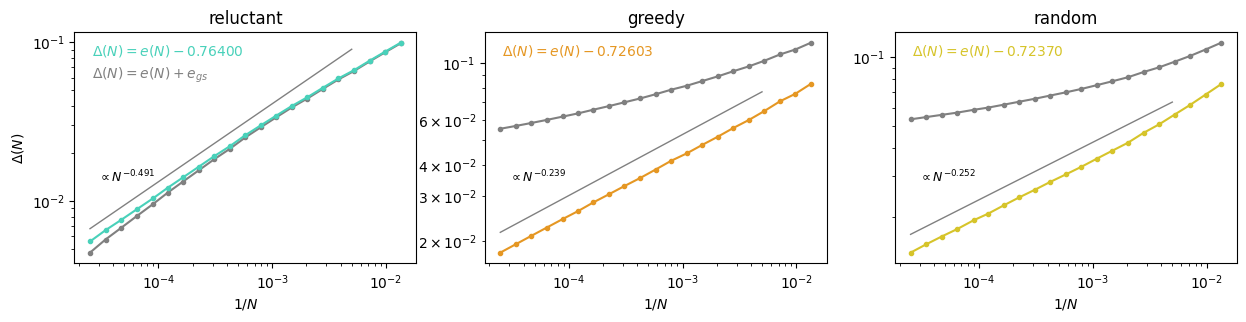

In [5]:
### FIG 1
gs_color = 'red'
fig, axes = plt.subplots(1,3,figsize=(3*width,1*height))
#### energy
x = np.linspace(40000,200)
cmap = plt.cm.get_cmap('plasma')
norm = Normalize(vmax=-0.70, vmin=-0.78)
ex_gss = np.concatenate([np.linspace(gs,gs-0.04,10)])
for i, (name, df) in enumerate([('reluctant',df_rel),('greedy',df_ext),('random',df_rand)]):
    ax = axes[i]
    df = df.groupby(['n']).mean().reset_index().sort_values(by='energy')
    ns = df.n
    es = df.energy
    ax.plot(1/ns,es+gs,c = 'grey',marker='.')
    ax.plot(1/ns,es-best_fits[name],c = single_algo_color[name] ,marker='.')
    b, c = power_law_fit(ns[:last_x_points], es[:last_x_points], -best_fits[name], initial_guess=(1.0, 1.0))
    yy = b * x ** (-c) - a

    ax.plot(1/x,1.2*b*x**(-c),lw=1,c='grey')
    ax.text(0.07, 0.35, '$\propto N^{-'+f"{c:.3f}"+'}$', fontsize=9, transform=ax.transAxes)
    fit = best_fits[name]
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$1/N$')
    
    ax.set_title(name)
    ax.text(0.05, 0.9, f'$\Delta(N) = e(N) {fit:.5f} $', fontsize=10, transform=ax.transAxes,c = single_algo_color[name])
axes[0].set_ylabel('$\Delta(N)$')
axes[0].text(0.05, 0.8, '$\Delta(N) = e(N) + e_{gs} $', fontsize=10, transform=axes[0].transAxes,c='grey')

plt.savefig(save_dir / 'Fig_A1-approximate-fts.png',dpi=300,bbox_inches='tight')

In [6]:
hist_rel = [(100,np.load(CLEAN_DIR / 'reluctant_hs_last_hist/42687_hist_n=100.npy')),
           (1000,np.load(CLEAN_DIR / 'reluctant_hs_last_hist/22823_hist_n=1000.npy')),
            (10000,np.load(CLEAN_DIR / 'reluctant_hs_last_hist/24971_hist_n=10000.npy')
                                   +np.load(CLEAN_DIR / 'reluctant_hs_last_hist/49331_hist_n=10000.npy'))
           ]


hist_extremal = [(100,np.load(CLEAN_DIR / 'extremal_hs_last_hist/50038_hist_n=100.npy')),
                 (1000,np.load(CLEAN_DIR / 'extremal_hs_last_hist/39283_hist_n=1000.npy')),
                 (10000,np.load(CLEAN_DIR / 'extremal_hs_last_hist/98758_hist_n=10000.npy'))
                ]
hist_random = [(100,np.load(CLEAN_DIR / 'random_hs_last_hist/55324_hist_n=100.npy')),
                (1000,np.load(CLEAN_DIR / 'random_hs_last_hist/67058_hist_n=1000.npy')),
              (10000,np.load(CLEAN_DIR / 'random_hs_last_hist/44335_hist_n=10000.npy')),]

dff_hists = [
    ('reluctant',hist_rel),
    ('greedy',hist_extremal),
    ('random',hist_random),
            ]

/tmp/ipykernel_3796380/1145969282.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('GnBu')


500
500
500
500
500
500
500
500
500


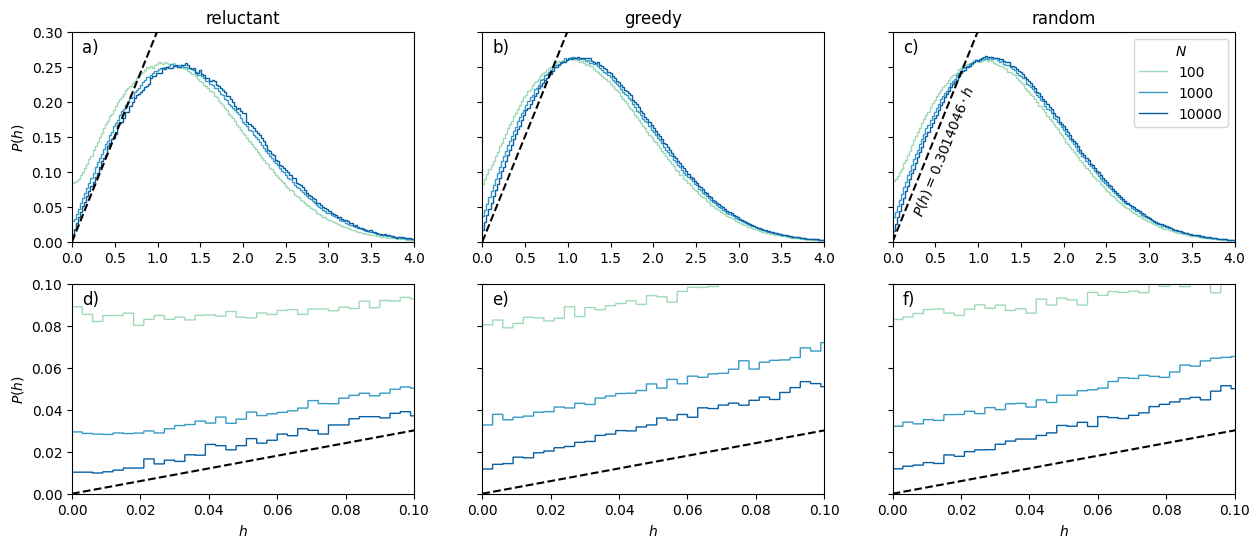

In [7]:
fig, axes = plt.subplots(2,3,figsize=(3*width,2*height),sharey='row')
axes =axes.T
cmap = plt.cm.get_cmap('GnBu')
colors = {
    100:cmap(0.4),
    1000:cmap(0.7),
    10000:cmap(0.9)
}


x = np.linspace(0,1.2,100)     
for i, (name, dff) in enumerate(dff_hists):
    
    ax = axes[i,0]
    for n, hist in dff:
        hist_2 = hist.reshape(-1,8).sum(axis=-1)
        print(len(hist_2))
        ax.stairs(hist_2/hist_2.sum()/(12/(len(hist_2)+1)),np.linspace(-6,6,(len(hist_2)+1)),label=n,color=colors[n])
        
    ax.set_title(name) 
    ax.set_xlim(0,4)
    ax.set_ylim(0,0.3)
    ax.plot(x,0.301406*x,c='black',linestyle='dashed')
    ax.plot(-x,0.301406*x,c='black')
    
    ax = axes[i,1]
    for n, hist in dff:
        ax.stairs(hist/hist.sum()/(12/4001),np.linspace(-6,6,4001),label=n,color=colors[n])
        
    
    ax.set_xlabel('$h$')
    ax.set_xlim(0,0.1)
    ax.set_ylim(0,0.1)
    ax.plot(x,0.3014046*x,c='black',linestyle='dashed')
    ax.plot(-x,0.3014046*x,c='black')
    
axes[2,0].text(0.05, 0.13, f'$P(h) = 0.3014046 \cdot h$', fontsize=10, transform=axes[2,0].transAxes,rotation=68)
axes[2,0].legend(title='$N$')
axes[0,0].set_ylabel( '$P(h)$')
axes[0,1].set_ylabel('$P(h)$')
axes[0,0].text(0.03, 0.9, f'a)', fontsize=12, transform=axes[0,0].transAxes)
axes[1,0].text(0.03, 0.9, f'b)', fontsize=12, transform=axes[1,0].transAxes)
axes[2,0].text(0.03, 0.9, f'c)', fontsize=12, transform=axes[2,0].transAxes)
axes[0,1].text(0.03, 0.9, f'd)', fontsize=12, transform=axes[0,1].transAxes)
axes[1,1].text(0.03, 0.9, f'e)', fontsize=12, transform=axes[1,1].transAxes)
axes[2,1].text(0.03, 0.9, f'f)', fontsize=12, transform=axes[2,1].transAxes)
plt.savefig(save_dir / 'Fig_2_fields.png',dpi=300,bbox_inches='tight')

In [8]:
eff_time = {
    'greedy': lambda n: 0.63*n,
    'reluctant': lambda n: 0.11*n,
    'random': lambda n: 1.05*n,
}
eff_time_name = {
    'greedy': r"$\frac{1}{0.63n}$",
    'reluctant': r"$\frac{1}{0.11n^2}$",
    'random': r"$\frac{1}{1.05n}$",
}


In [9]:
"""
df_fields_extremal = load_df('extremal_hs')
df_fields_extremal['hs_min'] = df_fields_extremal.hs.apply(lambda x: x[0])
df_fields_extremal['hs_max'] = df_fields_extremal.hs.apply(lambda x: x[1])

df_fields_random = load_df('random_hs')
df_fields_random['hs_min'] = df_fields_random.hs.apply(lambda x: x[0])
df_fields_random['hs_max'] = df_fields_random.hs.apply(lambda x: x[1])

df_fields_reluctant = load_df('reluctant_hs')
df_fields_reluctant['hs_min'] = df_fields_reluctant.hs.apply(lambda x: x[0])
df_fields_reluctant['hs_max'] = df_fields_reluctant.hs.apply(lambda x: x[1])
dfs_fields = [('reluctant',df_fields_reluctant),('greedy',df_fields_extremal),('random',df_fields_random)]


for name, dff in dfs_fields: 
    g = dff[dff.n == n].head(1000)
    if len(g) == 0:
        continue
    max_len = g.hs_max.apply(len).max()
    g.hs_max = g.hs_max.apply(lambda x: np.pad(x, (max_len - len(x),0), mode='constant', constant_values=x[0])).apply(abs)
    y_max = list(reversed(np.abs(g.hs_max.mean())))
    x_max = 1-(np.arange(max_len)/eff_time[name](n))
    ax.plot(x_max,y_max,color=single_algo_color[name])
    print(name, len(g.hs_min))
    g.hs_min = g.hs_min.apply(lambda x: np.pad(x, (max_len - len(x),0), mode='constant', constant_values=x[0])).apply(abs)
    y_min = list(reversed(np.abs(g.hs_min.mean())))
    x_min = 1-(np.arange(max_len)/eff_time[name](n))
    np.save(CLEAN_DIR / f'{name}_fields_xmin', x_min)
    np.save(CLEAN_DIR / f'{name}_fields_xmax', x_max)
    np.save(CLEAN_DIR / f'{name}_fields_ymin', y_min)
    np.save(CLEAN_DIR / f'{name}_fields_ymax', y_max)
"""

"\ndf_fields_extremal = load_df('extremal_hs')\ndf_fields_extremal['hs_min'] = df_fields_extremal.hs.apply(lambda x: x[0])\ndf_fields_extremal['hs_max'] = df_fields_extremal.hs.apply(lambda x: x[1])\n\ndf_fields_random = load_df('random_hs')\ndf_fields_random['hs_min'] = df_fields_random.hs.apply(lambda x: x[0])\ndf_fields_random['hs_max'] = df_fields_random.hs.apply(lambda x: x[1])\n\ndf_fields_reluctant = load_df('reluctant_hs')\ndf_fields_reluctant['hs_min'] = df_fields_reluctant.hs.apply(lambda x: x[0])\ndf_fields_reluctant['hs_max'] = df_fields_reluctant.hs.apply(lambda x: x[1])\ndfs_fields = [('reluctant',df_fields_reluctant),('greedy',df_fields_extremal),('random',df_fields_random)]\n\n\nfor name, dff in dfs_fields: \n    g = dff[dff.n == n].head(1000)\n    if len(g) == 0:\n        continue\n    max_len = g.hs_max.apply(len).max()\n    g.hs_max = g.hs_max.apply(lambda x: np.pad(x, (max_len - len(x),0), mode='constant', constant_values=x[0])).apply(abs)\n    y_max = list(reversed

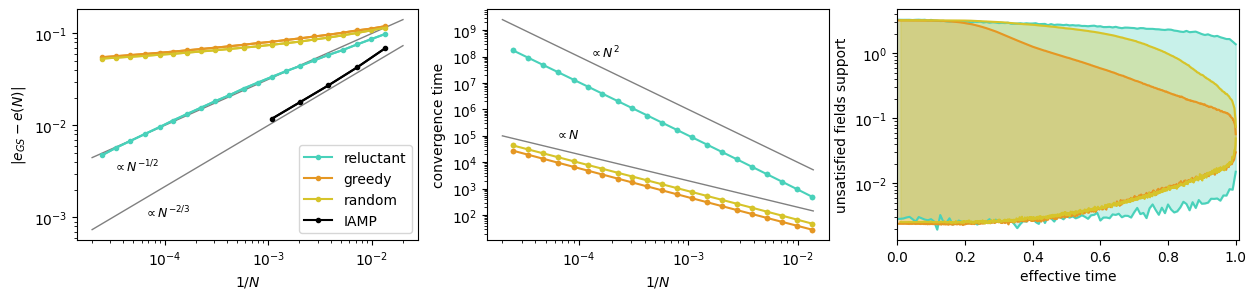

In [10]:
fig, axes = plt.subplots(1,3,figsize=(3*width,1*height))

ax = axes[0]

for name, df in [('reluctant',df_rel),('greedy',df_ext),('random',df_rand)]:
    n = df.n
    e = df.energy
    yerr = df.energy_std/np.sqrt(df.energy_samples)
    
    ax.plot(1/n,df.energy+gs,label=name,c=single_algo_color[name],marker='.')
    ax.errorbar(1/n,df.energy+gs,yerr=yerr,c=single_algo_color[name])
x = np.linspace(50000,50)
ax.plot(1/x,x**(-0.5),c='gray',zorder=-100,lw=1)
ax.plot(1/x,x**(-2/3),c='gray',zorder=-100,lw=1)

ax.plot(1/df_amp_energy.n,-df_amp_energy.energy+gs,marker='.',c=single_algo_color['iamp'],label='IAMP')
ax.errorbar(1/df_amp_energy.n,-df_amp_energy.energy+gs,
            yerr=df_amp_energy.energy_std/np.sqrt(df_amp_energy.energy_samples)
            ,c=single_algo_color['iamp'])
ax.annotate("$\propto N^{-1/2}$", xy=(np.power(10,-4.), np.power(10,-2.)), xytext=(np.power(10,-4.5), np.power(10,-2.5)),fontsize=9)
ax.annotate("$\propto N^{-2/3}$", xy=(np.power(10,-4.), np.power(10,-2.)), xytext=(np.power(10,-4.2), np.power(10,-3.)),fontsize=9)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$1/N$')
ax.set_ylabel('$|e_{GS}-e(N)|$')
ax.legend()

#### convergence

ax = axes[1]

for name, df in [('greedy',df_ext),('reluctant',df_rel),('random',df_rand)]:

    
    df = df.groupby(['n']).mean().reset_index()
    
    n = df.n
    t = df.t
    
    ax.scatter(1/n,df.t,label=name,c=single_algo_color[name],marker='.')
    ax.plot(1/n,df.t,label=name,c=single_algo_color[name],marker='.')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$1/N$')

x = np.linspace(50000,72)
ax.plot(1/x,x**(2),c='gray',zorder=-100,lw=1)
ax.plot(1/x,2* x**(1),c='gray',zorder=-100,lw=1)

ax.text(0.3, 0.79, '$\propto N^{2}$', fontsize=9, transform=ax.transAxes)
ax.text(0.2, 0.44, '$\propto N$', fontsize=9, transform=ax.transAxes)
ax.set_ylabel('convergence time')

####### xh support

n = 1000#1707
ax = plt.gca()

for name in ['reluctant','greedy','random']: 
    
    
    x_min = np.load(CLEAN_DIR / f'{name}_fields_xmin.npy')
    x_max = np.load(CLEAN_DIR / f'{name}_fields_xmax.npy')
    y_min = np.load(CLEAN_DIR / f'{name}_fields_ymin.npy')
    y_max = np.load(CLEAN_DIR / f'{name}_fields_ymax.npy')
    
    
    ax.plot(x_max,y_max,color=single_algo_color[name])
    ax.plot(x_min,y_min,color=single_algo_color[name])
    ax.fill_between(x_max,y_min,y_max,color=single_algo_color[name],alpha=0.3,zorder=-10)
    
    

for name, color in single_algo_color.items():
    ax.plot([],[],label=name,c=color)
ax.set_yscale('log')
ax.set_xlabel('effective time')
ax.set_ylabel('unsatisfied fields support')

ax.set_xlim(0,1.01)

plt.savefig(save_dir / 'Fig_AX_empirics_single_spin_flip__overview.png',dpi=300,bbox_inches='tight')

In [11]:
"""
df_flips_reluctant = load_df('reluctant_cnt_flips',pre_loaded=False)
df_flips_reluctant = df_flips_reluctant.groupby('n').head(400)
df_flips_reluctant.flips = df_flips_reluctant.flips.apply(lambda x: json.dumps(x.tolist()))
df_flips_reluctant.to_csv(CLEAN_DIR / 'reluctant_cnt_flips.csv',index=None)

df_flips_extremal = load_df('extremal_cnt_flips',pre_loaded=False)
df_flips_extremal = df_flips_extremal.groupby('n').head(400)
df_flips_extremal.flips = df_flips_extremal.flips.apply(lambda x: json.dumps(x.tolist()))
df_flips_extremal.to_csv(CLEAN_DIR / 'extremal_cnt_flips.csv',index=None)

df_flips_random = load_df('random_flip_cnt_flips',pre_loaded=False)
df_flips_random = df_flips_random.groupby('n').head(400)
df_flips_random.flips = df_flips_random.flips.apply(lambda x: json.dumps(x.tolist()))
df_flips_random.to_csv(CLEAN_DIR / 'random_flip_cnt_flips.csv',index=None)
"""

df_flips_extremal = pd.read_csv(CLEAN_DIR / 'extremal_cnt_flips.csv')
df_flips_reluctant = pd.read_csv(CLEAN_DIR / 'reluctant_cnt_flips.csv')
df_flips_random = pd.read_csv(CLEAN_DIR / 'random_flip_cnt_flips.csv')
df_flips_extremal.flips = df_flips_extremal.flips.apply(lambda x:  np.array([int(i) for i in json.loads(x)]))
df_flips_reluctant.flips = df_flips_reluctant.flips.apply(lambda x:  np.array([int(i) for i in json.loads(x)]))
df_flips_random.flips = df_flips_random.flips.apply(lambda x:  np.array([int(i) for i in json.loads(x)]))
df_flips_extremal.n = df_flips_extremal.n.apply(int)
df_flips_reluctant.n = df_flips_reluctant.n.apply(int)
df_flips_random.n = df_flips_random.n.apply(int)

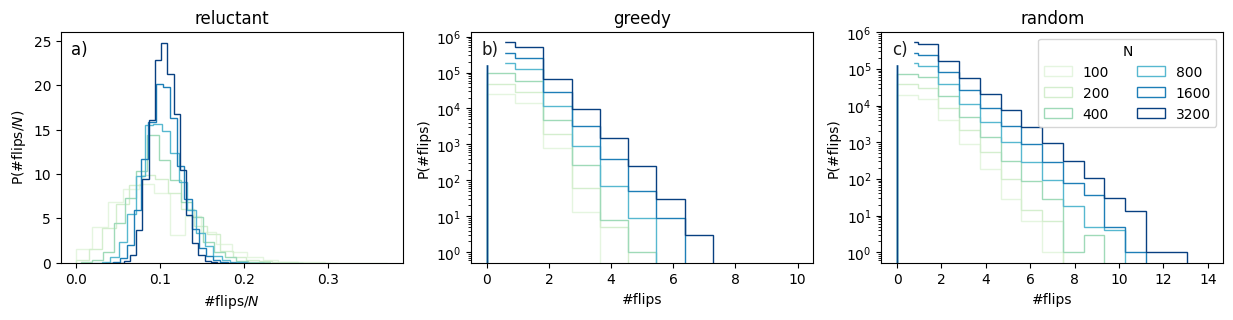

In [12]:
fig, axes = plt.subplots(1,3,figsize=(3*width,1*height))

cmap = mpl.colormaps['GnBu']
colors = {
    100:cmap(0.1),
    200:cmap(0.2),
    400:cmap(0.4),
    800:cmap(0.6),
    1600:cmap(0.8),
    3200:cmap(1.0)
}

ax = axes[0]
for n, g in df_flips_reluctant.groupby('n'):
    ax.hist(np.concatenate(g.flips.values/n**(1)),density=True,bins=20,label=n,histtype='step',color=colors[n]);
ax.set_xlabel('#flips$/N$')
ax.set_ylabel('P(#flips$/N$)')
ax.set_title('reluctant')


ax = axes[1]
for n, g in df_flips_extremal.groupby('n'):
    ax.hist(np.concatenate(g.flips.values),histtype='step',label=n,range=(0,10),bins=11,color=colors[n]);
ax.set_yscale('log')
ax.set_xlabel('#flips')
ax.set_title('greedy')
ax.set_ylabel('P(#flips)')


ax = axes[2]
for n, g in df_flips_random.groupby('n'):
    ax.hist(np.concatenate(g.flips.values),histtype='step',label=n,range=(0,14),bins=15,color=colors[n]);
ax.set_yscale('log')
ax.set_xlabel('#flips')
ax.set_ylabel('P(#flips)')
ax.set_title('random')
ax.legend(title='N',ncol=2)
axes[0].text(0.03, 0.9, f'a)', fontsize=12, transform=axes[0].transAxes)
axes[1].text(0.03, 0.9, f'b)', fontsize=12, transform=axes[1].transAxes,backgroundcolor='white',alpha=0.9)
axes[2].text(0.03, 0.9, f'c)', fontsize=12, transform=axes[2].transAxes,backgroundcolor='white',alpha=0.9)

plt.savefig(save_dir / 'Fig_AX_empirics_single_spin_flip__flips.png',dpi=300,bbox_inches='tight')

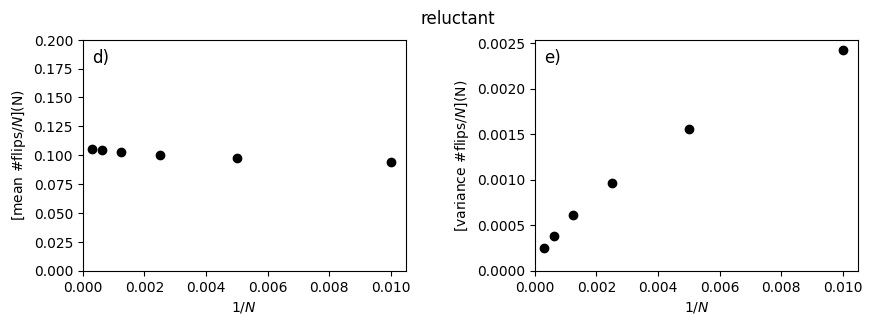

In [13]:
fig, axes = plt.subplots(1,2,figsize=(2*width,1*height))
ax = axes[0]
for n, g in df_flips_reluctant.groupby('n'):
    ax.scatter(1/n,np.concatenate(g.flips.values/n**(1)).mean(),color='black')
ax.set_xlabel('$1/N$')
ax.set_ylabel('[mean #flips/$N$](N)')
ax.set_xlim(0)
ax.set_ylim(0,0.2)


ax = axes[1]
for n, g in df_flips_reluctant.groupby('n'):
    ax.scatter(1/n,np.concatenate(g.flips.values/n**(1)).var(),color='black')
ax.set_xlabel('$1/N$')
ax.set_ylabel('[variance #flips/$N$](N)')
plt.subplots_adjust(wspace=0.4)
ax.set_xlim(0)
ax.set_ylim(0)
fig.suptitle('reluctant')

axes[0].text(0.03, 0.9, f'd)', fontsize=12, transform=axes[0].transAxes)
axes[1].text(0.03, 0.9, f'e)', fontsize=12, transform=axes[1].transAxes)
plt.savefig(save_dir / 'Fig_AX_empirics_single_spin_flip__flips_2.png',dpi=300,bbox_inches='tight')